In [1]:
import pandas as pd
import numpy as np
import shap
import joblib
import matplotlib.pyplot as plt

In [2]:
model = joblib.load("../models/baseline_model.pkl")
print("Model loaded successfully")

Model loaded successfully


In [3]:
df = pd.read_csv("../data/raw/ai4i_predictive_maintenance.csv")

print("Dataset loaded")
print(df.head())

Dataset loaded
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0 

In [4]:
df = df.drop(["UDI", "Product ID", "Type"], axis=1)

print("Removed string columns")

Removed string columns


In [5]:
X = df.drop("Machine failure", axis=1)
y = df["Machine failure"]

print("Feature shape:", X.shape)

Feature shape: (10000, 10)


100%|===================| 19902/20000 [02:04<00:00]        

SHAP values generated successfully


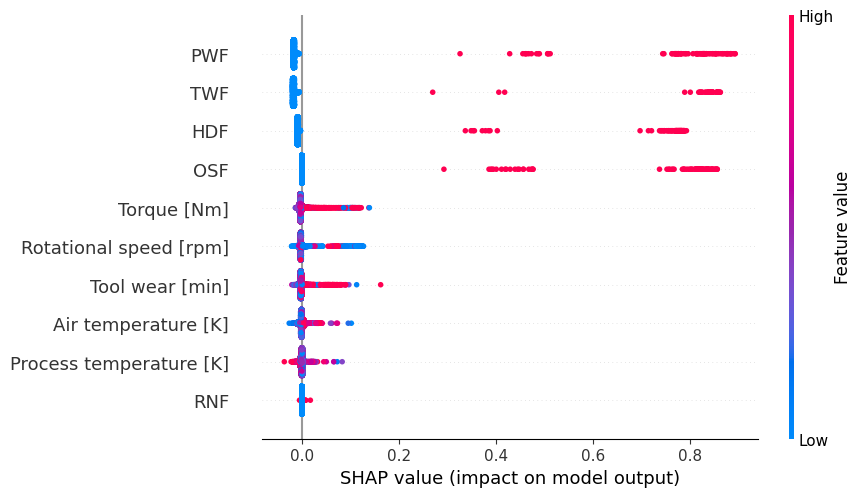

In [6]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X, check_additivity=False)

print("SHAP values generated successfully")

# Select class 1 (Failure class)
shap.plots.beeswarm(shap_values[..., 1])

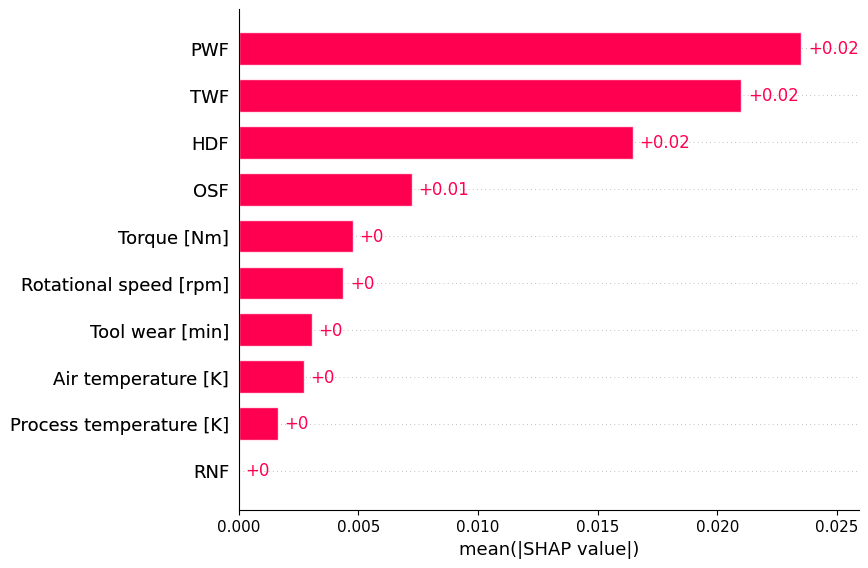

In [7]:
shap.plots.bar(shap_values[..., 1])